In [1]:
import pandas as pd
import numpy as np
#pip install palmerpenguins
from palmerpenguins import load_penguins
import matplotlib.pyplot as plt

In [2]:
penguins = load_penguins()
penguins.tail()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009
343,Chinstrap,Dream,50.2,18.7,198.0,3775.0,female,2009


In [3]:
attributeNames = np.asarray(penguins.columns) #headers (attribute names)
print(penguins.shape)
print(attributeNames)

(344, 8)
['species' 'island' 'bill_length_mm' 'bill_depth_mm' 'flipper_length_mm'
 'body_mass_g' 'sex' 'year']


In [4]:
# Inspect the data
print(penguins.to_string())

       species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g     sex  year
0       Adelie  Torgersen            39.1           18.7              181.0       3750.0    male  2007
1       Adelie  Torgersen            39.5           17.4              186.0       3800.0  female  2007
2       Adelie  Torgersen            40.3           18.0              195.0       3250.0  female  2007
3       Adelie  Torgersen             NaN            NaN                NaN          NaN     NaN  2007
4       Adelie  Torgersen            36.7           19.3              193.0       3450.0  female  2007
5       Adelie  Torgersen            39.3           20.6              190.0       3650.0    male  2007
6       Adelie  Torgersen            38.9           17.8              181.0       3625.0  female  2007
7       Adelie  Torgersen            39.2           19.6              195.0       4675.0    male  2007
8       Adelie  Torgersen            34.1           18.1              193

# 1 - Preprocessing and transformations.

Only problem seems to be the Nans, those objects (rows) will now be deleted.

## 1.1 - Start removing Nans and making a visual inspection

(333, 8)
(344, 8)
       species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g     sex  year
0       Adelie  Torgersen            39.1           18.7              181.0       3750.0    male  2007
1       Adelie  Torgersen            39.5           17.4              186.0       3800.0  female  2007
2       Adelie  Torgersen            40.3           18.0              195.0       3250.0  female  2007
4       Adelie  Torgersen            36.7           19.3              193.0       3450.0  female  2007
5       Adelie  Torgersen            39.3           20.6              190.0       3650.0    male  2007
6       Adelie  Torgersen            38.9           17.8              181.0       3625.0  female  2007
7       Adelie  Torgersen            39.2           19.6              195.0       4675.0    male  2007
12      Adelie  Torgersen            41.1           17.6              182.0       3200.0  female  2007
13      Adelie  Torgersen            38.6           21.

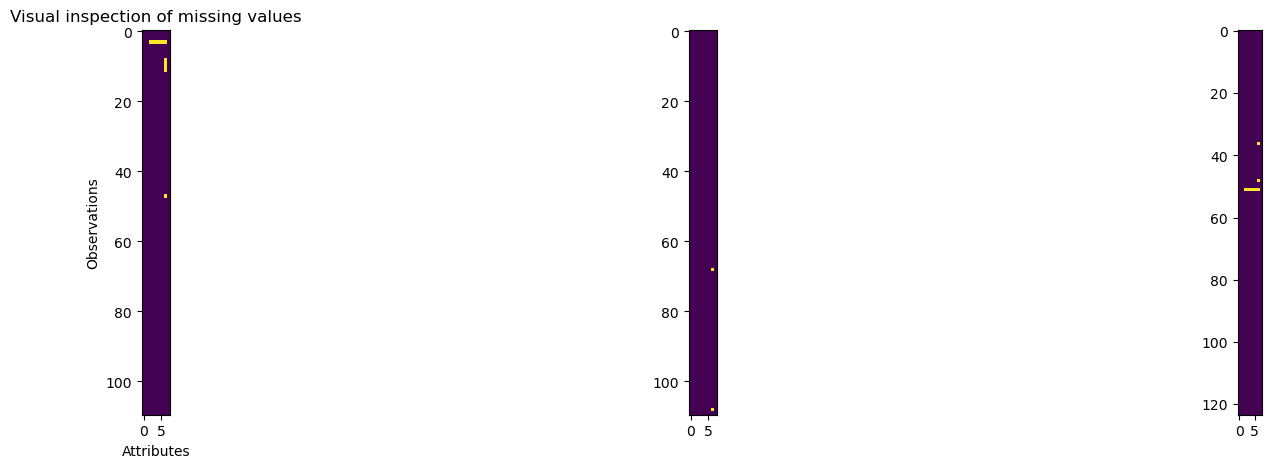

In [5]:
## Missing values - visual inspection
# Missing float values
#nan_float=penguins.iloc[:, [2,3,4,5,7]]
#print(penguins.isnull().sum())
missing_idx=penguins.isnull()
obs_row_missing = np.sum(missing_idx, 1) > 0  #axis 1 is rows
obs_drop_missing = penguins.iloc[np.logical_not(obs_row_missing).values,:]
print(obs_drop_missing.shape)
print(penguins.shape)
#print(nan_float.isnull().sum())
#missing_idx = np.isnan(penguins[:,aux].values)

print(obs_drop_missing.to_string())

# Another approach is to first investigate where the missing values are.
# A quick way to do this is to visually look at the missing_idx:
plt.subplots(1,3,figsize=(20,5))
plt.subplot(1,3,1)
plt.title('Visual inspection of missing values')
plt.imshow(missing_idx.iloc[:110,:])
plt.ylabel('Observations'); plt.xlabel('Attributes')
plt.subplot(1,3,2)
plt.imshow(missing_idx.iloc[110:220,:])
plt.subplot(1,3,3)
plt.imshow(missing_idx.iloc[220:,:])

plt.show()

penguins=obs_drop_missing # update penguins with no missing values

## 1.2 - Standarization of continuous variables.

In [6]:
#print(penguins.describe()) # 4 continuous variables
# Standarize the data
X = np.matrix(penguins.iloc[:,2:6].values, dtype=float)

X = (X - X.mean(axis=0)) / X.std(axis=0)
penguins.iloc[:,2:6]=X
display(penguins.describe())
# Check that it worked -> mean approximately zero, std approximately 1
X[:,2:6].mean(axis=0)
X[:,2:6].std(axis=0)



,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,3.330000e+02,3.330000e+02,3.330000e+02,3.330000e+02,333.000000
mean,-3.499370e-15,-1.280257e-15,2.133762e-16,-1.280257e-16,2008.042042
std,1.001505e+00,1.001505e+00,1.001505e+00,1.001505e+00,0.812944
min,-2.177987e+00,-2.067291e+00,-2.069852e+00,-1.874435e+00,2007.000000
25%,-8.227879e-01,-7.958519e-01,-7.836512e-01,-8.172292e-01,2007.000000
50%,9.288742e-02,6.872642e-02,-2.834620e-01,-1.953432e-01,2008.000000
75%,8.437412e-01,7.807321e-01,8.598276e-01,7.063915e-01,2009.000000
max,2.858227e+00,2.204743e+00,2.146028e+00,2.603144e+00,2009.000000


matrix([[1., 1.]])

# 1.3 - Drop years

In [7]:
penguins.drop(['year'], axis=1, inplace=True)
print(penguins.to_string())

       species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g     sex
0       Adelie  Torgersen       -0.896042       0.780732          -1.426752    -0.568475    male
1       Adelie  Torgersen       -0.822788       0.119584          -1.069474    -0.506286  female
2       Adelie  Torgersen       -0.676280       0.424729          -0.426373    -1.190361  female
4       Adelie  Torgersen       -1.335566       1.085877          -0.569284    -0.941606  female
5       Adelie  Torgersen       -0.859415       1.747026          -0.783651    -0.692852    male
6       Adelie  Torgersen       -0.932669       0.323014          -1.426752    -0.723946  female
7       Adelie  Torgersen       -0.877728       1.238450          -0.426373     0.582014    male
12      Adelie  Torgersen       -0.529772       0.221299          -1.355296    -1.252549  female
13      Adelie  Torgersen       -0.987609       2.052171          -0.712196    -0.506286    male
14      Adelie  Torgersen     

## 1.3 - One hot encoding
May automatise.

In [18]:
## One-out-of-K encoding 

# Of 'species' attribute
"""   # extract unique labels and assign number
species = np.asarray(penguins['species']) # attribute species for each penguin
speciesNames = np.unique(species) # unique species names
speciesDict = dict(zip(speciesNames,range(len(speciesNames))))
species_num = np.array([speciesDict[value] for value in species]) 
  # Preallocate memory, then extract data to matrix X
Ksp=len(speciesNames)
species_encoding = np.zeros((species.size, Ksp),dtype=int)
species_encoding[np.arange(species.size), species_num] = 1 

X=penguins.drop(['species'],axis=1).values
X= np.concatenate((species_encoding,X),axis=1)  # for interpretations, see speciesDict """
Ksp=0
X=penguins.values
#print(X)

# Of island
islands=np.asarray(penguins['island'])
islandNames = np.unique(islands)
islandDict = dict(zip(islandNames,range(len(islandNames))))
island_num = np.array([islandDict[value] for value in islands])
  # Preallocate memory, then extract data to matrix X
Kis=len(islandNames)
island_encoding = np.zeros((islands.size, Kis),dtype=int)
island_encoding[np.arange(islands.size), island_num] = 1

X=np.concatenate((X[:,:Ksp+1],island_encoding,X[:,Ksp+2:]),axis=1)  # for interpretations, see islandDict
# Of sex --> don't need 2 variables, since let's do: 0-female, 1-male
sexes=np.asarray(penguins['sex'])
sexNames=np.unique(sexes)
sexDict = dict(zip(sexNames,range(len(sexNames))))
sex_num = np.matrix([sexDict[value] for value in sexes]) # attribute species for each penguin
#print(X[4:8,:])
X=np.concatenate((X[:,:-1], sex_num.T),axis=1)  # for interpretations, see sexDict X[:,-1]
X[:4,:]


matrix([['Adelie', 0, 0, 1, -0.8960418897725961, 0.7807321043966313,
         -1.426751567213706, -0.5684747832140795, 1],
        ['Adelie', 0, 0, 1, -0.8227878667457079, 0.11958396669455268,
         -1.0694735766270282, -0.5062861817652331, 0],
        ['Adelie', 0, 0, 1, -0.6762798206919316, 0.4247292610185895,
         -0.42637319357100817, -1.1903607977025434, 0],
        ['Adelie', 0, 0, 1, -1.3355660279339268, 1.085877398720668,
         -0.5692843898056793, -0.9416063919071579, 0]], dtype=object)

In [199]:
print(sexDict)
print(islandDict)
print(speciesDict)
penguins = pd.DataFrame(X)
penguins

{'female': 0, 'male': 1}
{'Biscoe': 0, 'Dream': 1, 'Torgersen': 2}
{'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2}


,0,1,2,3,4,5,6,7,8,9,10,11
0,1,0,0,0,0,1,-0.896042,0.780732,-1.426752,-0.568475,1,2007
1,1,0,0,0,0,1,-0.822788,0.119584,-1.069474,-0.506286,0,2007
2,1,0,0,0,0,1,-0.67628,0.424729,-0.426373,-1.190361,0,2007
3,1,0,0,0,0,1,-1.335566,1.085877,-0.569284,-0.941606,0,2007
4,1,0,0,0,0,1,-0.859415,1.747026,-0.783651,-0.692852,1,2007
...,...,...,...,...,...,...,...,...,...,...,...,...
328,0,1,0,0,1,0,2.162314,1.340165,0.431094,-0.257532,1,2009
329,0,1,0,0,1,0,-0.090248,0.475587,0.073816,-1.003795,0,2009
330,0,1,0,0,1,0,1.026876,0.526444,-0.569284,-0.53738,1,2009
331,0,1,0,0,1,0,1.246638,0.933305,0.645461,-0.133155,1,2009


## 1.4. Basic statistics